In [3]:
## I always import these
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

## relevant for this notebook
import cartopy.crs as ccrs

## python functions written by me that I frequently use
import alexas_functions
# alexas_functions.list_my_functions()

## relevant for this notebook
## link: https://pypi.org/project/global-land-mask/
from global_land_mask import globe

In [4]:
#### OPEN DATA
## open a had file (single ensemble member)
had_sat_sst_name = alexas_functions.get_filename('had_ensm', 'tas', omtype='obs')
print('observation dataset:\n', had_sat_sst_name)
had_sat_sst = xr.open_dataset(had_sat_sst_name)
had_sat_sst.close()
had_sat_sst = alexas_functions.uniform_coords(had_sat_sst, ['latitude','longitude'])

mpi_tas_hist_name= alexas_functions.get_filename('mpi_ensm', 'tas')
mpi_tas_hist = xr.open_dataset(mpi_tas_hist_name)
mpi_tas_hist.close()
print('model dataset:\n', mpi_tas_hist_name)

mpi_tas_rcp85_name= alexas_functions.get_filename('mpi_ensm', 'tas', exp='rcp85')
mpi_tas_rcp85 = xr.open_dataset(mpi_tas_rcp85_name)
mpi_tas_rcp85.close()
print('model dataset:\n', mpi_tas_rcp85_name)

mpi_tas = xr.merge([mpi_tas_hist, mpi_tas_rcp85])
mpi_tas = alexas_functions.uniform_coords(mpi_tas)
print('model datasets merged')

observation dataset:
 C:\Users\alexa\Documents\RESEARCH\DATA\had_ensm\Version_4.6\temperature_anomaly\HadCRUT.4.6.0.0.anomalies.1.nc
model dataset:
 C:\Users\alexa\Documents\RESEARCH\DATA\mpi_ensm\tas\tas_Amon_MPI-ESM_historical_r001i1850p3_185001-200512.nc
model dataset:
 C:\Users\alexa\Documents\RESEARCH\DATA\mpi_ensm\tas\tas_Amon_MPI-ESM_rcp85_r001i2005p3_200601-209912.nc
model datasets merged


In [10]:
def calculate_percent_ocean_gridded(da, subdiv=10):
    """ PURPOSE: 
        da
        subdiv=10: """
    
    ##da is xarray dataset
    lat = da[lat_var].values
    lon = da[lon_var].values
        
    #print(lon)
    irange = range(0,lat.size)
    jrange = range(0,lon.size)

    ## initializing the mask for percentage ocean at each gridd point
    percents = np.zeros((lat.size, lon.size))
    
    ## latitude loop
    print('Making a data array of the % ocean area in each latlon grid box for the globe')
    print('with grid shape (lat, lon):', percents.shape)
    print('')
    print('current latitude:')
    ##### ----- LAT LOOP 
    for i in irange:
        currlat1 = lat[i] 
        print(round(currlat1,5), end=',  ')

        ## if not the last latitude
        if currlat1==lat[lat.size-1]:
            lat_incr = (-lat[i] + lat[i-1])
        else:
            lat_incr = (lat[i] - lat[i+1])
            
        lat_incr12 = abs(lat_incr/2)
        currlatspan = (lat[i]) - lat_incr12, (lat[i]) + lat_incr12

        ##### ----- LON LOOP 
        for j in jrange:

            currlon1 = lon[j]
            if currlon1==lon[lon.size-1]:
                lon_incr = (-lon[j] + lon[j-1])          
            else: 
                lon_incr = (lon[j] - lon[j+1])
                
            lon_incr12 = abs(lon_incr/2)
            currlonspan = (lon[j]) - lon_incr12, (lon[j]) + lon_incr12 


            percentocean = 0
            sub_lat = np.linspace(currlatspan[0], currlatspan[1], subdiv+1)[0:subdiv] 
            sub_lon = np.linspace(currlonspan[0], currlonspan[1], subdiv+1)[0:subdiv]

            ind_n = np.where(sub_lon<-180)[0]
            sub_lon[ind_n] = sub_lon[ind_n] + 360

            ind_p = np.where(sub_lon>180)[0]
            sub_lon[ind_p] = sub_lon[ind_p] - 360
   
            for ii in range(0, sub_lat.size):
                for jj in range(0, sub_lon.size):

                    if globe.is_ocean( sub_lat[ii], sub_lon[jj] ):
                         percentocean+=1
                    else:
                         continue 

            ## should be inside lat loop, inside lon loop                
            percents[i, j] = percentocean

    print('... done.')
    return percents

                
p1 = calculate_percent_ocean_gridded(mpi_tas)

Making a data array representing the % ocean area in each latlon grid box for the globe
grid shape (lat, lon): (96, 192)

current latitude:
-88.57217,  -86.72253,  -84.86197,  -82.99894,  -81.13498,  -79.27056,  -77.40589,  -75.54106,  -73.67613,  -71.81113,  -69.94608,  -68.08099,  -66.21587,  -64.35073,  -62.48557,  -60.6204,  -58.75521,  -56.89001,  -55.02481,  -53.1596,  -51.29438,  -49.42915,  -47.56393,  -45.69869,  -43.83346,  -41.96822,  -40.10298,  -38.23774,  -36.37249,  -34.50724,  -32.64199,  -30.77674,  -28.91149,  -27.04624,  -25.18099,  -23.31573,  -21.45048,  -19.58522,  -17.71996,  -15.8547,  -13.98945,  -12.12419,  -10.25893,  -8.39367,  -6.52841,  -4.66315,  -2.79789,  -0.93263,  0.93263,  2.79789,  4.66315,  6.52841,  8.39367,  10.25893,  12.12419,  13.98945,  15.8547,  17.71996,  19.58522,  21.45048,  23.31573,  25.18099,  27.04624,  28.91149,  30.77674,  32.64199,  34.50724,  36.37249,  38.23774,  40.10298,  41.96822,  43.83346,  45.69869,  47.56393,  49.42915,  5

In [11]:
p2 = calculate_percent_ocean_gridded(had_sat_sst)

Making a data array representing the % ocean area in each latlon grid box for the globe
grid shape (lat, lon): (36, 72)

current latitude:
-87.5,  -82.5,  -77.5,  -72.5,  -67.5,  -62.5,  -57.5,  -52.5,  -47.5,  -42.5,  -37.5,  -32.5,  -27.5,  -22.5,  -17.5,  -12.5,  -7.5,  -2.5,  2.5,  7.5,  12.5,  17.5,  22.5,  27.5,  32.5,  37.5,  42.5,  47.5,  52.5,  57.5,  62.5,  67.5,  72.5,  77.5,  82.5,  87.5,  ... done.


In [184]:
# (177.1875, 177.375,  177.5625, 177.75,   177.9375, 178.125,  178.3125, 178.5, 178.6875, 178.875)   
# f2 = np.gradient(np.asarray([-179.0625, -178.875,  -178.6875, -178.5, -178.3125 -178.125  -177.9375
#  -177.75,   -177.5625, -177.375]))
# for k in f2:
#     print(round(k,3))
# print(' \n')
# # for k in f1:
# #     print(round(k,3))

In [13]:
np.unique(p2)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

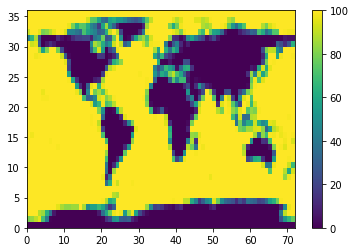

In [14]:
plt.pcolormesh(p2)
plt.colorbar()

In [100]:
np.unique(p1)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])

In [ ]:
#### MAKE MASK
## initialize an array with sizes (time, lat lon) relative to the model

available_obs_mask=np.ones(mpi_tas['tas'].shape)
for ym in range(mpi_tas['time'].size):
     available_obs_mask[ym, :, :] = mask_for_available_obs(mpi_tas['tas'], had_sat_sst['temperature_anomaly'], ym)
    
    
## loop through each month for the entire time frame
## send model and had data array (such as for tas) to function 
## function will search for nans in had, then mask out the same spots in model array
## the result should be a binary mask. essentially 1 or nan. or a 1 or 0. 1 meaning keep, nan(0) meaning delete.

## now this binary mask (all, sea, or land) can be applied to any ensemble member of that model
## the mask is time dependant 

#mpi_tas